In [239]:
import pandas as pd
import os

In [240]:
national = pd.read_csv('Data/presidential_national_toplines_2020.csv')
national.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,ecwin_inc,ecwin_chal,ecwin_3rd,...,national_voteshare_inc_hi,national_voteshare_chal_hi,national_voteshare_3rd_hi,nat_voteshare_other_hi,national_voteshare_inc_lo,national_voteshare_chal_lo,national_voteshare_3rd_lo,nat_voteshare_other_lo,timestamp,simulations
0,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,0.307525,0.688200,NaN,...,50.76155,56.91839,NaN,2.051201,41.77486,47.88276,NaN,0.700771,19:00:02 29 Aug 2020,40000
1,2020,President,polls-plus,8/28/2020,Trump,Biden,NaN,0.303500,0.692525,NaN,...,50.75557,56.87645,NaN,2.055656,41.81157,47.90101,NaN,0.702267,19:00:03 28 Aug 2020,40000
2,2020,President,polls-plus,8/27/2020,Trump,Biden,NaN,0.299400,0.696400,NaN,...,50.70728,56.78292,NaN,2.031385,41.89773,47.98074,NaN,0.694661,19:00:04 27 Aug 2020,40000
3,2020,President,polls-plus,8/26/2020,Trump,Biden,NaN,0.300550,0.695550,NaN,...,50.74532,56.80884,NaN,2.043283,41.88205,47.91171,NaN,0.693459,19:01:03 26 Aug 2020,40000
4,2020,President,polls-plus,8/25/2020,Trump,Biden,NaN,0.270450,0.725875,NaN,...,50.43880,57.08401,NaN,2.018928,41.62480,48.26421,NaN,0.676493,23:50:03 25 Aug 2020,40000


In [241]:
national.columns

Index(['cycle', 'branch', 'model', 'modeldate', 'candidate_inc',
       'candidate_chal', 'candidate_3rd', 'ecwin_inc', 'ecwin_chal',
       'ecwin_3rd', 'ec_nomajority', 'popwin_inc', 'popwin_chal', 'popwin_3rd',
       'ev_inc', 'ev_chal', 'ev_3rd', 'ev_inc_hi', 'ev_chal_hi', 'ev_3rd_hi',
       'ev_inc_lo', 'ev_chal_lo', 'ev_3rd_lo', 'national_voteshare_inc',
       'national_voteshare_chal', 'national_voteshare_3rd',
       'nat_voteshare_other', 'national_voteshare_inc_hi',
       'national_voteshare_chal_hi', 'national_voteshare_3rd_hi',
       'nat_voteshare_other_hi', 'national_voteshare_inc_lo',
       'national_voteshare_chal_lo', 'national_voteshare_3rd_lo',
       'nat_voteshare_other_lo', 'timestamp', 'simulations'],
      dtype='object')

In [242]:
national_row_count = len(national['modeldate'].unique())

national_row_df = pd.DataFrame({"Total row count": [row_count]})
national_row_df.head()

,Total row count
0,90


In [243]:
clean_national = national[['modeldate', 'candidate_inc', 'candidate_chal', 'ecwin_inc',  'ecwin_chal', 'popwin_inc', 'popwin_chal',
                     'ev_inc', 'ev_chal','national_voteshare_inc', 'national_voteshare_chal',]]

clean_national.head()

,modeldate,candidate_inc,candidate_chal,ecwin_inc,ecwin_chal,popwin_inc,popwin_chal,ev_inc,ev_chal,national_voteshare_inc,national_voteshare_chal
0,8/29/2020,Trump,Biden,0.307525,0.688200,0.188325,0.811675,220.7868,317.2131,46.26345,52.40189
1,8/28/2020,Trump,Biden,0.303500,0.692525,0.186225,0.813775,220.4639,317.5361,46.25870,52.40611
2,8/27/2020,Trump,Biden,0.299400,0.696400,0.182875,0.817125,220.3914,317.6086,46.28278,52.39348
3,8/26/2020,Trump,Biden,0.300550,0.695550,0.185375,0.814625,220.8551,317.1448,46.30215,52.37099
4,8/25/2020,Trump,Biden,0.270450,0.725875,0.162850,0.837150,213.9388,324.0612,46.02112,52.67421


In [244]:
state = pd.read_csv('Data/presidential_state_toplines_2020.csv')
state.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,state,tipping,vpi,...,voteshare_other_lo,margin,margin_hi,margin_lo,win_EC_if_win_state_inc,win_EC_if_win_state_chal,win_state_if_win_EC_inc,win_state_if_win_EC_chal,timestamp,simulations
0,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,Wyoming,0.000000,0.000000,...,1.760318,40.74294,54.113930,27.13451,0.308084,0.974683,0.999837,0.002797,19:00:02 29 Aug 2020,40000
1,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,Wisconsin,0.107137,5.011207,...,0.537197,-3.79877,6.969395,-14.61968,0.823779,0.937569,0.869116,0.920336,19:00:02 29 Aug 2020,40000
2,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,West Virginia,0.000063,0.012120,...,0.970930,34.54181,49.629980,19.21864,0.309796,0.963855,0.999025,0.011625,19:00:02 29 Aug 2020,40000
3,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,Washington,0.001488,0.061238,...,1.195726,-23.67945,-10.950130,-36.26453,0.824373,0.695528,0.037395,0.996549,19:00:02 29 Aug 2020,40000
4,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,Virginia,0.012337,0.415733,...,0.559551,-10.50077,-1.084093,-19.93654,0.979187,0.743805,0.244777,0.997711,19:00:02 29 Aug 2020,40000


In [245]:
state.columns

Index(['cycle', 'branch', 'model', 'modeldate', 'candidate_inc',
       'candidate_chal', 'candidate_3rd', 'state', 'tipping', 'vpi',
       'winstate_inc', 'winstate_chal', 'winstate_3rd', 'voteshare_inc',
       'voteshare_chal', 'voteshare_3rd', 'voteshare_other',
       'voteshare_inc_hi', 'voteshare_chal_hi', 'voteshare_3rd_hi',
       'voteshare_other_hi', 'voteshare_inc_lo', 'voteshare_chal_lo',
       'voteshare_3rd_lo', 'voteshare_other_lo', 'margin', 'margin_hi',
       'margin_lo', 'win_EC_if_win_state_inc', 'win_EC_if_win_state_chal',
       'win_state_if_win_EC_inc', 'win_state_if_win_EC_chal', 'timestamp',
       'simulations'],
      dtype='object')

In [246]:
state_row_count = len(state['modeldate'].unique())

state_row_df = pd.DataFrame({"Total row count": [row_count]})
state_row_df.head()

,Total row count
0,90


In [247]:
clean_state = state[['modeldate', 'candidate_inc', 'candidate_chal', 'state', 'tipping', 'vpi',
                     'winstate_inc', 'winstate_chal', 'voteshare_inc','voteshare_chal',
                    'margin','win_EC_if_win_state_inc', 'win_EC_if_win_state_chal' ]]

clean_state.head()

,modeldate,candidate_inc,candidate_chal,state,tipping,vpi,winstate_inc,winstate_chal,voteshare_inc,voteshare_chal,margin,win_EC_if_win_state_inc,win_EC_if_win_state_chal
0,8/29/2020,Trump,Biden,Wyoming,0.000000,0.000000,0.998025,0.001975,68.65373,27.91079,40.74294,0.308084,0.974683
1,8/29/2020,Trump,Biden,Wisconsin,0.107137,5.011207,0.324450,0.675550,47.59384,51.39261,-3.79877,0.823779,0.937569
2,8/29/2020,Trump,Biden,West Virginia,0.000063,0.012120,0.991700,0.008300,66.34062,31.79882,34.54181,0.309796,0.963855
3,8/29/2020,Trump,Biden,Washington,0.001488,0.061238,0.013950,0.986050,37.00761,60.68705,-23.67945,0.824373,0.695528
4,8/29/2020,Trump,Biden,Virginia,0.012337,0.415733,0.076875,0.923125,44.22121,54.72198,-10.50077,0.979187,0.743805


In [248]:
scenario = pd.read_csv('Data/presidential_scenario_analysis_2020.csv')
scenario.head()

,cycle,branch,model,modeldate,candidate_inc,candidate_chal,candidate_3rd,scenario_id,probability,scenario_description,timestamp,simulations
0,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,9,0.755800,Biden majority (at least 50 percent of the vote),19:00:02 29 Aug 2020,40000
1,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,8,0.142575,Trump majority (at least 50 percent of the vote),19:00:02 29 Aug 2020,40000
2,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,6,0.122575,Biden wins popular vote but loses Electoral Co...,19:00:02 29 Aug 2020,40000
3,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,5,0.001238,Trump wins popular vote but loses Electoral Co...,19:00:02 29 Aug 2020,40000
4,2020,President,polls-plus,8/29/2020,Trump,Biden,NaN,4,0.811675,Biden wins popular vote,19:00:02 29 Aug 2020,40000


In [249]:
scenario.columns

Index(['cycle', 'branch', 'model', 'modeldate', 'candidate_inc',
       'candidate_chal', 'candidate_3rd', 'scenario_id', 'probability',
       'scenario_description', 'timestamp', 'simulations'],
      dtype='object')

In [250]:
scenario_row_count = len(scenario['modeldate'].unique())

scenario_row_df = pd.DataFrame({"Total row count": [row_count]})
scenario_row_df.head()

,Total row count
0,90


In [251]:
clean_scenario = scenario[['modeldate', 'candidate_inc','candidate_chal', 'scenario_id', 'probability', 
                           'scenario_description' ]]

clean_scenario.head()

,modeldate,candidate_inc,candidate_chal,scenario_id,probability,scenario_description
0,8/29/2020,Trump,Biden,9,0.755800,Biden majority (at least 50 percent of the vote)
1,8/29/2020,Trump,Biden,8,0.142575,Trump majority (at least 50 percent of the vote)
2,8/29/2020,Trump,Biden,6,0.122575,Biden wins popular vote but loses Electoral Co...
3,8/29/2020,Trump,Biden,5,0.001238,Trump wins popular vote but loses Electoral Co...
4,8/29/2020,Trump,Biden,4,0.811675,Biden wins popular vote


In [252]:
clean_scenario.to_csv('Data/clean_scenario.csv')

In [253]:
clean_state.to_csv('Data/clean_state.csv')

In [254]:
clean_national.to_csv('Data/clean_national.csv')

In [255]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib

matplotlib.style.use('ggplot')

import datetime

In [257]:
electoral_stack_chart_df = national[['modeldate', 'ecwin_inc',  'ecwin_chal']]

electoral_stack_chart_df.head()

,modeldate,ecwin_inc,ecwin_chal
0,8/29/2020,0.307525,0.688200
1,8/28/2020,0.303500,0.692525
2,8/27/2020,0.299400,0.696400
3,8/26/2020,0.300550,0.695550
4,8/25/2020,0.270450,0.725875


In [258]:
electoral_stack_chart_df['modeldate'] = pd.to_datetime(electoral_stack_chart_df['modeldate'].str.strip(), format='%m/%d/%Y')
electoral_stack_chart_df.head()

<ipython-input-258-b1a1e4dff0c2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  electoral_stack_chart_df['modeldate'] = pd.to_datetime(electoral_stack_chart_df['modeldate'].str.strip(), format='%m/%d/%Y')


,modeldate,ecwin_inc,ecwin_chal
0,2020-08-29,0.307525,0.688200
1,2020-08-28,0.303500,0.692525
2,2020-08-27,0.299400,0.696400
3,2020-08-26,0.300550,0.695550
4,2020-08-25,0.270450,0.725875


In [262]:
start_date = '08-01-2020'
end_date = '08-31-2020'

In [263]:
mask = (electoral_stack_chart_df['modeldate'] > start_date) & (electoral_stack_chart_df['modeldate'] <= end_date)

In [264]:
electoral_stack_chart_df = electoral_stack_chart_df.loc[mask]
electoral_stack_chart_df

,modeldate,ecwin_inc,ecwin_chal
0,2020-08-29,0.307525,0.688200
1,2020-08-28,0.303500,0.692525
2,2020-08-27,0.299400,0.696400
3,2020-08-26,0.300550,0.695550
4,2020-08-25,0.270450,0.725875
5,2020-08-24,0.269575,0.726975
6,2020-08-23,0.267300,0.729625
7,2020-08-22,0.271000,0.725500
8,2020-08-21,0.267575,0.728750
9,2020-08-20,0.273650,0.722825


In [265]:
#Save the query results as a Pandas DataFrame and set the index to the date column
electoral_stack_chart_df.set_index('modeldate', inplace=True)
electoral_stack_chart_df.head()

,ecwin_inc,ecwin_chal
modeldate,,
2020-08-29,0.307525,0.688200
2020-08-28,0.303500,0.692525
2020-08-27,0.299400,0.696400
2020-08-26,0.300550,0.695550
2020-08-25,0.270450,0.725875


In [266]:
# Rename candidates columns
electoral_stack_chart_df.rename(columns={"ecwin_inc": "Trump", "ecwin_chal": "Biden"}, inplace=True)
electoral_stack_chart_df.head()

,Trump,Biden
modeldate,,
2020-08-29,0.307525,0.688200
2020-08-28,0.303500,0.692525
2020-08-27,0.299400,0.696400
2020-08-26,0.300550,0.695550
2020-08-25,0.270450,0.725875


In [267]:
electoral_stack_chart_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 28 entries, 2020-08-29 to 2020-08-02
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Trump   28 non-null     float64
 1   Biden   28 non-null     float64
dtypes: float64(2)
memory usage: 672.0 bytes


In [268]:
# DataFrameGroupBy (grouped by Month)
electoral_group_month = electoral_stack_chart_df.groupby(pd.Grouper(freq="M"))

electoral_group_month.sum()

,Trump,Biden
modeldate,,
2020-08-31,7.923725,19.976825


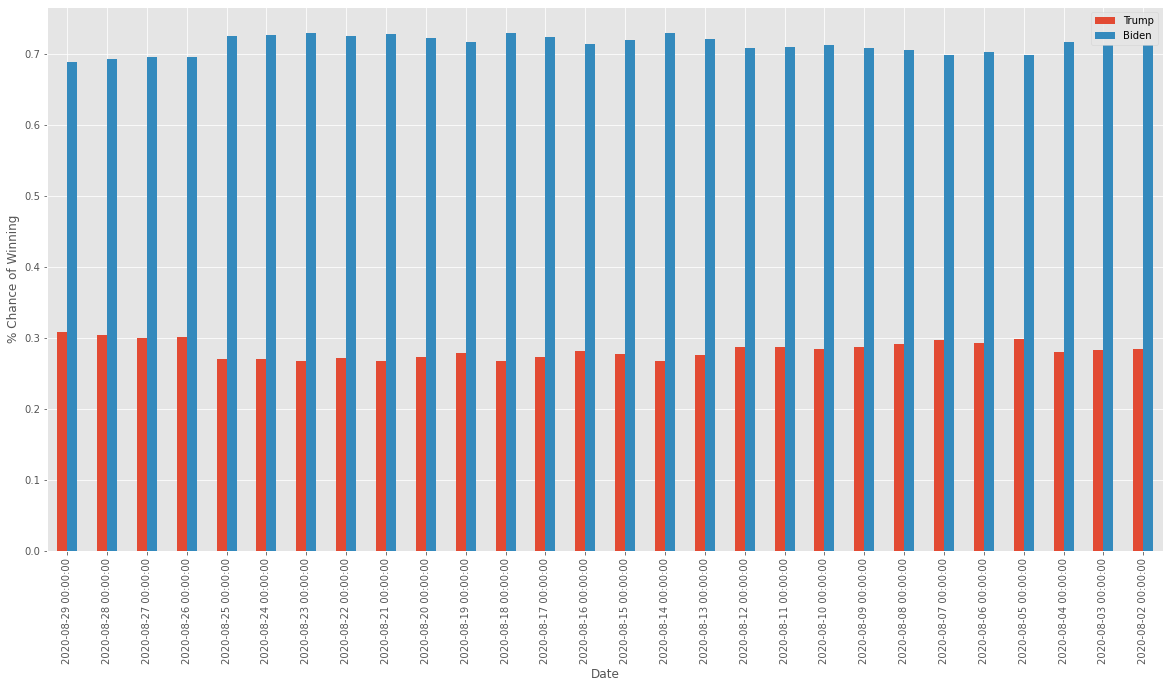

In [269]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = electoral_stack_chart_df.plot(kind='bar', figsize=(20, 10))
ax.set_xlabel("Date")
ax.set_ylabel("% Chance of Winning")

plt.xticks(rotation=90)
plt.legend(loc="upper right")
plt.show()

plt.show()

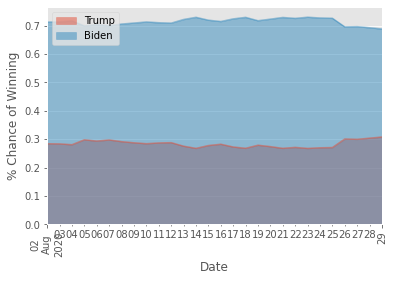

In [271]:
# Plot the daily normals as an area plot with `stacked=False`
ax = electoral_stack_chart_df.plot.area(stacked = False)
ax.set_xlabel("Date")
ax.set_ylabel("Chance of Winning(%)")

plt.xticks(rotation=90)
plt.legend(loc="upper left")

Text(0, 0.5, '% Chance of Winning')

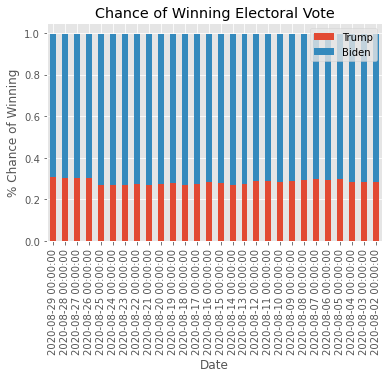

In [272]:
electoral_stack_chart_df.plot(kind='bar', stacked=True)
plt.title("Chance of Winning Electoral Vote")
plt.xlabel("Date")
plt.ylabel("Chance of Winning (%)")

Text(0, 0.5, 'Chance of Winning (%)')

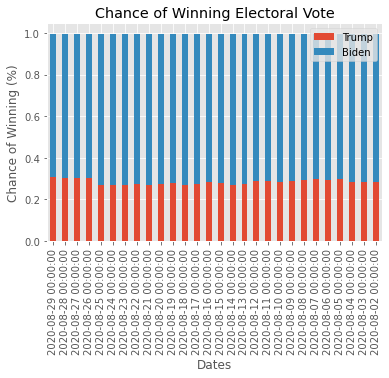

In [275]:
electoral_stack_chart_df.reset_index().plot(x="modeldate", y=["Trump", "Biden"], kind="bar", stacked=True
)
plt.title("Chance of Winning Electoral Vote")
plt.xlabel("Dates")
plt.ylabel("Chance of Winning (%)")